In [1]:
from typing import List, Dict
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import klib as kl
import missingno as mns
import os
import warnings


os.environ['KERAS_BACKEND']='tensorflow'
os.environ["CUDA_VISIBLE_DEVICES"]="0"
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
warnings.filterwarnings('ignore')
plt.rcParams['font.sans-serif'] = ['Kaiti']
plt.rcParams['axes.unicode_minus'] = False
PIC_PATH = "../models/image/image1"
DATA_PATH = '../data/data/'
RESULT_PATH = '../data/summary/'
MODEL_PATH = '../models/model1/'

In [2]:
import pathlib2 as pl2
import shutil

def creat_dir():
    pic_path = pl2.Path(PIC_PATH)
    if os.path.exists(PIC_PATH):
        shutil.rmtree(PIC_PATH)
    pic_path.mkdir(parents=True, exist_ok=True)
    if not os.path.exists(RESULT_PATH):
        os.mkdir(RESULT_PATH)
    if not os.path.exists(MODEL_PATH):
        os.mkdir(MODEL_PATH)

creat_dir()

In [3]:
figure_count = 0

def create_figure(figure_name, dpi=800):
    global figure_count
    figure_count += 1
    plt.savefig(PIC_PATH + f'/figure{figure_count}_{figure_name}.png', dpi=dpi)

In [4]:
def read_natural_data() -> List[pd.DataFrame]:
    data_path = pl2.Path(DATA_PATH)
    lst = []
    for dir in data_path.iterdir():
        temp = pd.DataFrame()
        if dir.is_dir() and dir.name not in ['附件9', '附件8']:
            for txt in dir.iterdir():
                array = pd.read_csv(txt, header=None, sep='  ', dtype='float32').T
                array.columns = [dir.name[2:] + '_' + txt.stem]
                temp = pd.concat([temp, array], axis=1)
            lst.append(temp)
    return lst

def read_unnatural_data() -> List[pd.DataFrame]:
    data_path = pl2.Path(DATA_PATH)
    lst = []
    for dir in data_path.iterdir():
        temp = pd.DataFrame()
        if dir.is_dir() and dir.name in ['附件8']:
            for txt in dir.iterdir():
                array = pd.read_csv(txt, header=None, dtype='float32')
                array.columns = [dir.name[2:] + '_' + txt.stem]
                temp = pd.concat([temp, array], axis=1)
            lst.append(temp)
    return lst

In [5]:
earth = read_natural_data()
earth

[           1_1      1_10      1_11      1_12      1_13      1_14      1_15  \
 0     0.031847  0.001247 -0.018077 -0.015064 -0.004527  0.001362  0.001121   
 1    -0.011189 -0.007641 -0.000769 -0.014596  0.024943 -0.020155 -0.011509   
 2    -0.019609 -0.002028  0.005312  0.003179  0.007167  0.009315 -0.008702   
 3     0.019685 -0.028223 -0.000301  0.006454 -0.011077  0.004637  0.018897   
 4    -0.020076 -0.024481 -0.010124 -0.011789 -0.013415 -0.002380 -0.010573   
 ...        ...       ...       ...       ...       ...       ...       ...   
 7995 -2.936200 -0.176508  0.106352  0.074749  0.000618  0.016799  0.000186   
 7996 -3.392283 -0.133005  0.097932  0.125737 -0.023706  0.002765  0.002993   
 7997 -2.868840 -0.115230  0.050687  0.150997 -0.017625  0.026155  0.024043   
 7998 -2.935732 -0.082953  0.002506  0.178128 -0.021835  0.004637  0.024043   
 7999 -2.460470 -0.043660 -0.037723  0.199178 -0.012479  0.013524 -0.000750   
 
           1_16      1_17      1_18      1_19     

In [6]:
shed = read_unnatural_data()
shed

[            8_1        8_10       8_11       8_12       8_13       8_14  \
 0    -12.301487  -52.974918  30.222185 -34.472843  -9.929483 -11.462684   
 1    -20.110670  -63.585136  27.883707 -34.941616  -2.428831 -13.176380   
 2    -26.796997  -73.951225  24.410229 -32.846516   4.266169 -14.008988   
 3    -31.890671  -83.117523  20.066750 -28.490801   9.683778 -13.850945   
 4    -35.068832  -90.394264  15.197185 -22.375698  13.444864 -12.696162   
 ...         ...         ...        ...        ...        ...        ...   
 7995 -57.212711   12.369864  13.085880  38.160221  26.052256  -4.225728   
 7996 -69.285774   45.109211   9.530229  35.254505  23.603559  -1.027902   
 7997 -79.474342   77.298561   7.378489  33.205730  21.450951   2.710794   
 7998 -86.434143  106.945518   6.581532  32.236954  19.919212   6.803403   
 7999 -89.259445  132.300735   6.992402  32.468994  19.270735  11.021011   
 
            8_15       8_16       8_17       8_18  ...       8_28       8_29  \
 0    

In [7]:
data = earth + shed
def get_all_data(lst: List[pd.DataFrame]) -> pd.DataFrame:
    temp = pd.DataFrame()
    for i in lst:
        temp = pd.concat([temp, i], axis=1)
    return  temp

data = get_all_data(data)
data

,1_1,1_10,1_11,1_12,1_13,1_14,1_15,1_16,1_17,1_18,...,8_28,8_29,8_3,8_30,8_4,8_5,8_6,8_7,8_8,8_9
0,0.031847,0.001247,-0.018077,-0.015064,-0.004527,0.001362,0.001121,-0.060829,-0.113750,-0.137995,...,11.053165,-5.428255,-3.481101,-11.606074,14.613235,-56.581928,-19.432631,-33.967102,16.815691,23.275391
1,-0.011189,-0.007641,-0.000769,-0.014596,0.024943,-0.020155,-0.011509,-0.071120,-0.162867,-0.102444,...,15.089084,-4.420704,-0.793958,-10.087299,17.036705,-55.657642,-28.327196,-32.017540,10.192864,5.198435
2,-0.019609,-0.002028,0.005312,0.003179,0.007167,0.009315,-0.008702,-0.036972,-0.154447,-0.095895,...,17.843573,-2.655398,2.013185,-9.089544,19.010990,-53.212746,-35.569153,-27.452972,5.472429,-12.615696
3,0.019685,-0.028223,-0.000301,0.006454,-0.011077,0.004637,0.018897,0.016355,-0.090361,-0.101508,...,19.054186,-0.385398,4.666858,-8.460361,20.438337,-49.525192,-40.711327,-20.603409,2.710255,-28.700695
4,-0.020076,-0.024481,-0.010124,-0.011789,-0.013415,-0.002380,-0.010573,0.074827,-0.041245,-0.050053,...,18.593573,2.107255,6.870124,-7.919340,21.253235,-44.935604,-43.475456,-12.023408,1.658299,-41.896564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,-2.936200,-0.176508,0.106352,0.074749,0.000618,0.016799,0.000186,0.094473,0.033132,-0.124896,...,-9.548468,36.734196,-14.756203,58.555965,14.489765,-25.795603,-49.127632,38.119202,4.280690,17.495827
7996,-3.392283,-0.133005,0.097932,0.125737,-0.023706,0.002765,0.002993,0.085118,0.030325,-0.136592,...,-8.434589,43.017868,-9.988856,52.443722,17.156092,-29.644175,-73.555237,32.112026,16.642647,9.981479
7997,-2.868840,-0.115230,0.050687,0.150997,-0.017625,0.026155,0.024043,0.046760,0.019098,-0.124429,...,-7.400916,48.391541,-4.615999,46.517189,19.705276,-31.971317,-95.766106,27.962679,27.897211,2.834087
7998,-2.935732,-0.082953,0.002506,0.178128,-0.021835,0.004637,0.024043,0.020097,0.038745,-0.147818,...,-6.257651,52.505825,1.435226,40.839844,22.088541,-32.558460,-113.732628,25.867680,37.658298,-3.782435


In [8]:
def return_time_features(multi_series: pd.DataFrame) -> pd.DataFrame:
    """
    四分位数，标注查，平均值，最大值，最小值，方差，极差，整流平均值，偏度，峰度，均方根，波形因子，峰值因子，脉冲因子，裕度因子
    :param multi_series: 多个序列信号
    :return: 信号的时序指标
    """
    describe = multi_series.describe().T
    describe['var'] = multi_series.var(axis=0)
    describe['range'] = describe['max'] - describe['min']
    describe['f_avg'] = multi_series.abs().mean(axis=0)
    describe['skew'] = multi_series.skew(axis=0)
    describe['kurt'] = multi_series.kurt(axis=0)
    describe['rms'] = (multi_series ** 2).sum(0).pow(1/2)
    describe['s'] = describe.rms / describe.f_avg
    describe['c'] = describe.range / describe.rms
    describe['impulse'] =  describe.range / describe.f_avg
    xr = np.sqrt(multi_series.abs(), ).mean() ** 2
    describe['l'] = describe.range / xr
    return describe.T

describe = return_time_features(data)
describe.to_csv(RESULT_PATH + 'describe.csv')
describe

,1_1,1_10,1_11,1_12,1_13,1_14,1_15,1_16,1_17,1_18,...,8_28,8_29,8_3,8_30,8_4,8_5,8_6,8_7,8_8,8_9
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,...,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8000.000000,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03
mean,-0.002181,-0.002428,0.001997,-0.002477,0.001086,-0.000168,-0.000052,0.009526,0.002211,0.000378,...,-3.871265e-01,-6.183519e+00,-3.795985e+00,2.051379e-01,-4.421016e-01,-6.586834,-4.965765e+00,-3.966943e+00,1.497653e+00,-5.581623e+00
std,2.700258,0.320987,0.113933,0.343242,0.208335,0.103100,0.188211,0.132731,0.067904,0.203714,...,3.408650e+03,3.337748e+03,4.276383e+03,1.965276e+03,1.588462e+03,742.724854,1.616372e+03,1.621321e+03,1.747904e+03,1.773079e+03
min,-29.125179,-2.252036,-0.561166,-2.543400,-2.020647,-0.543131,-1.882618,-0.997319,-0.236776,-1.456659,...,-2.629583e+04,-2.501657e+04,-3.102439e+04,-1.535872e+04,-9.906578e+03,-4670.527832,-9.264673e+03,-9.937412e+03,-9.310641e+03,-9.855844e+03
25%,-0.107551,-0.094764,-0.049886,-0.095522,-0.063467,-0.045883,-0.054076,-0.048666,-0.040309,-0.073441,...,-9.627051e+01,-1.265382e+02,-1.545455e+02,-7.213311e+01,-6.880646e+01,-49.687796,-1.222130e+02,-1.046997e+02,-1.147458e+02,-1.070399e+02
50%,-0.001833,-0.005302,-0.001704,-0.004305,-0.000784,-0.000509,0.000887,0.009806,0.002258,-0.002807,...,1.725716e+00,1.355205e-01,3.676654e+00,5.355579e-01,4.219867e+00,-1.517847,-8.174587e+00,4.081701e+00,7.760582e+00,2.034087e+00
75%,0.083887,0.082757,0.055364,0.085976,0.060494,0.045334,0.056319,0.068278,0.042955,0.072037,...,9.699832e+01,1.083979e+02,1.504951e+02,7.891438e+01,6.548477e+01,39.976083,1.093931e+02,9.468523e+01,1.230887e+02,8.083034e+01
max,31.983370,2.271838,0.572726,2.424394,2.376927,0.597310,1.338496,0.966410,0.334380,1.481450,...,2.426320e+04,2.267254e+04,4.007955e+04,1.582421e+04,1.066630e+04,6883.982910,1.315725e+04,1.221035e+04,1.376368e+04,1.215909e+04
var,7.291394,0.103032,0.012981,0.117815,0.043404,0.010630,0.035423,0.017618,0.004611,0.041499,...,1.161890e+07,1.114056e+07,1.828746e+07,3.862311e+06,2.523213e+06,551640.250000,2.612658e+06,2.628680e+06,3.055169e+06,3.143808e+06
range,61.108549,4.523874,1.133892,4.967794,4.397574,1.140441,3.221114,1.963729,0.571156,2.938109,...,5.055903e+04,4.768912e+04,7.110393e+04,3.118293e+04,2.057287e+04,11554.510742,2.242193e+04,2.214777e+04,2.307432e+04,2.201493e+04


In [9]:
def plot_event(event: pd.DataFrame, freq=200) -> None:
    plt.figure(figsize=(20, 15))
    feather = event.shape
    wide = np.ceil(feather[1] / 5)
    time = np.arange(0, feather[0]) / freq
    count = 1
    for i in event.columns:
        plt.subplot(min(wide, 5), max(wide, 5), count)
        plt.plot(time, event[i])
        count += 1
    create_figure(f'event_{event.columns.tolist()[0].split("_")[0]}')

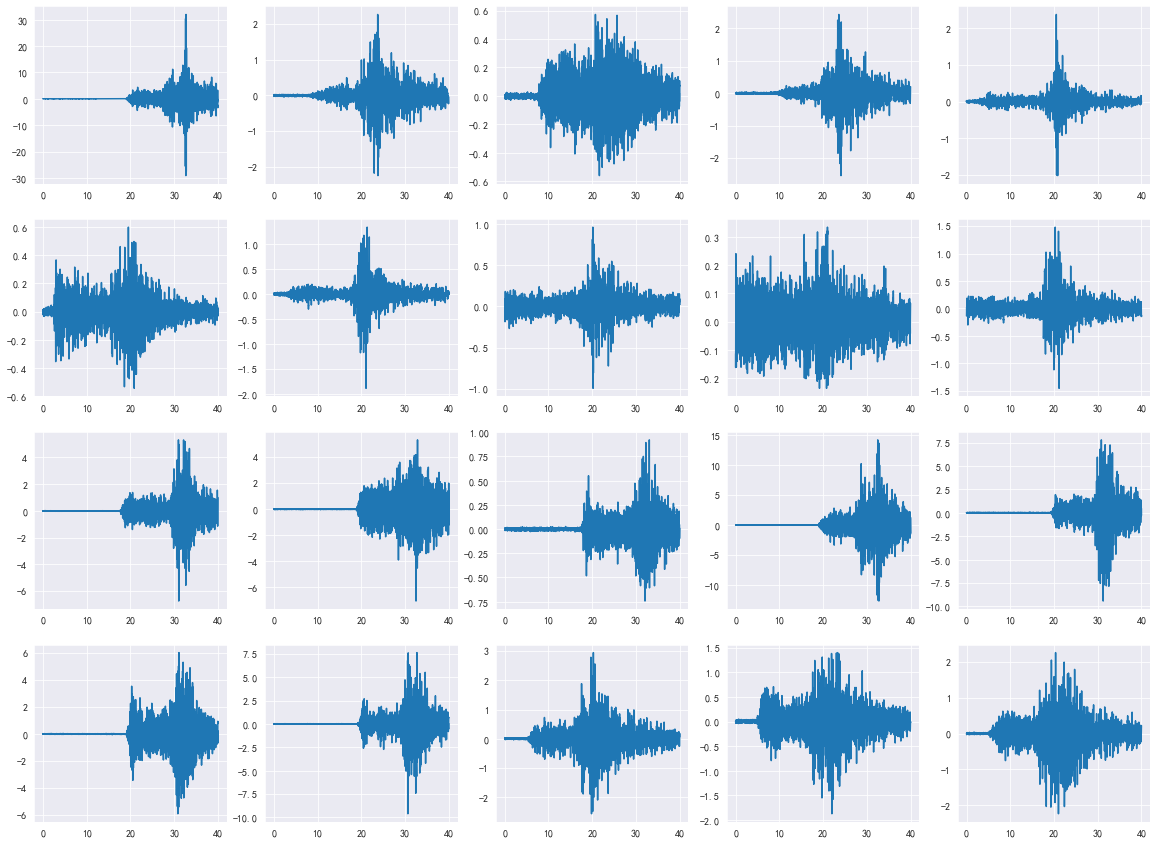

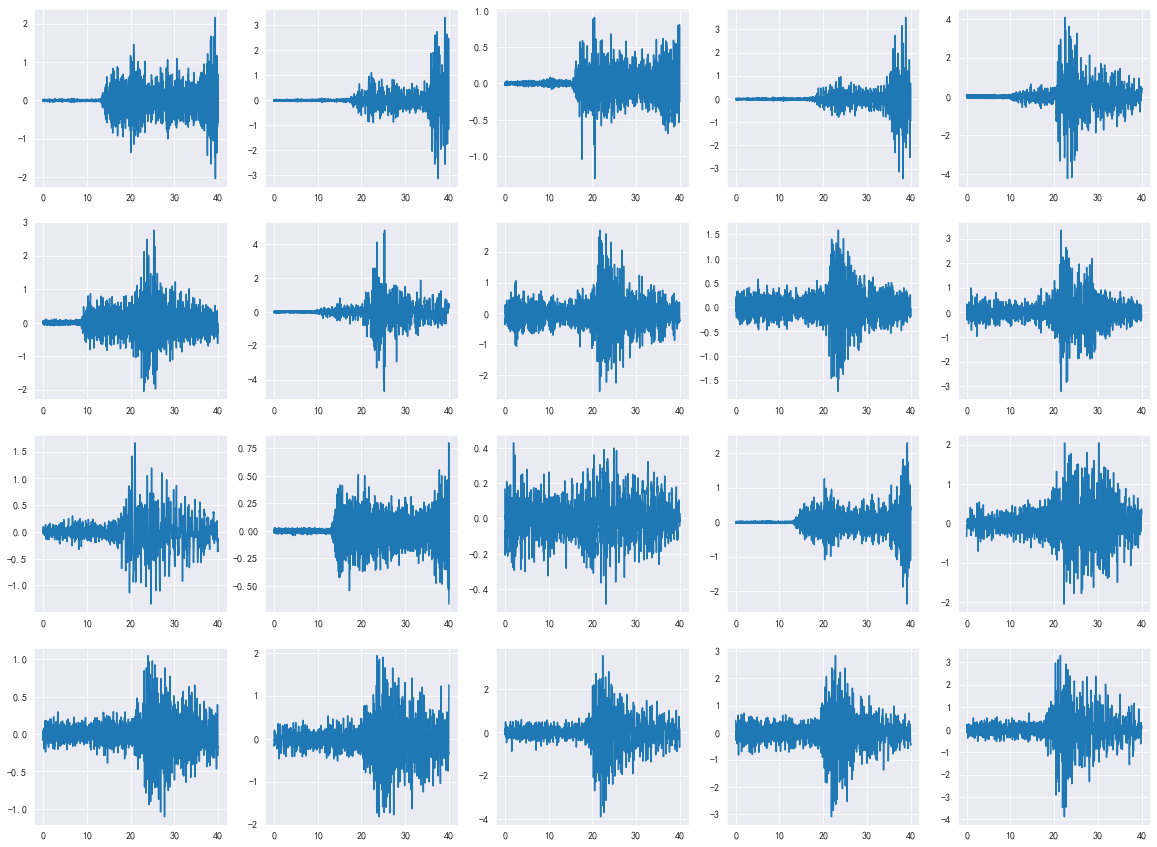

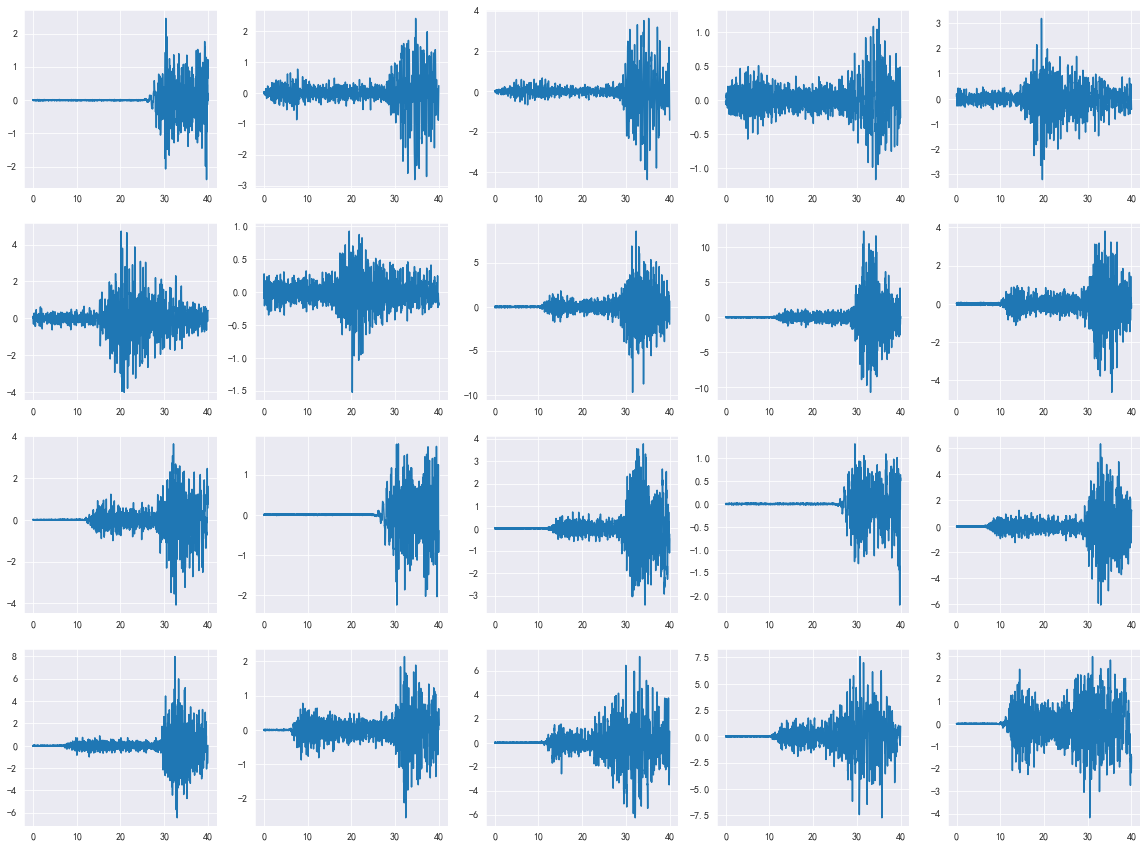

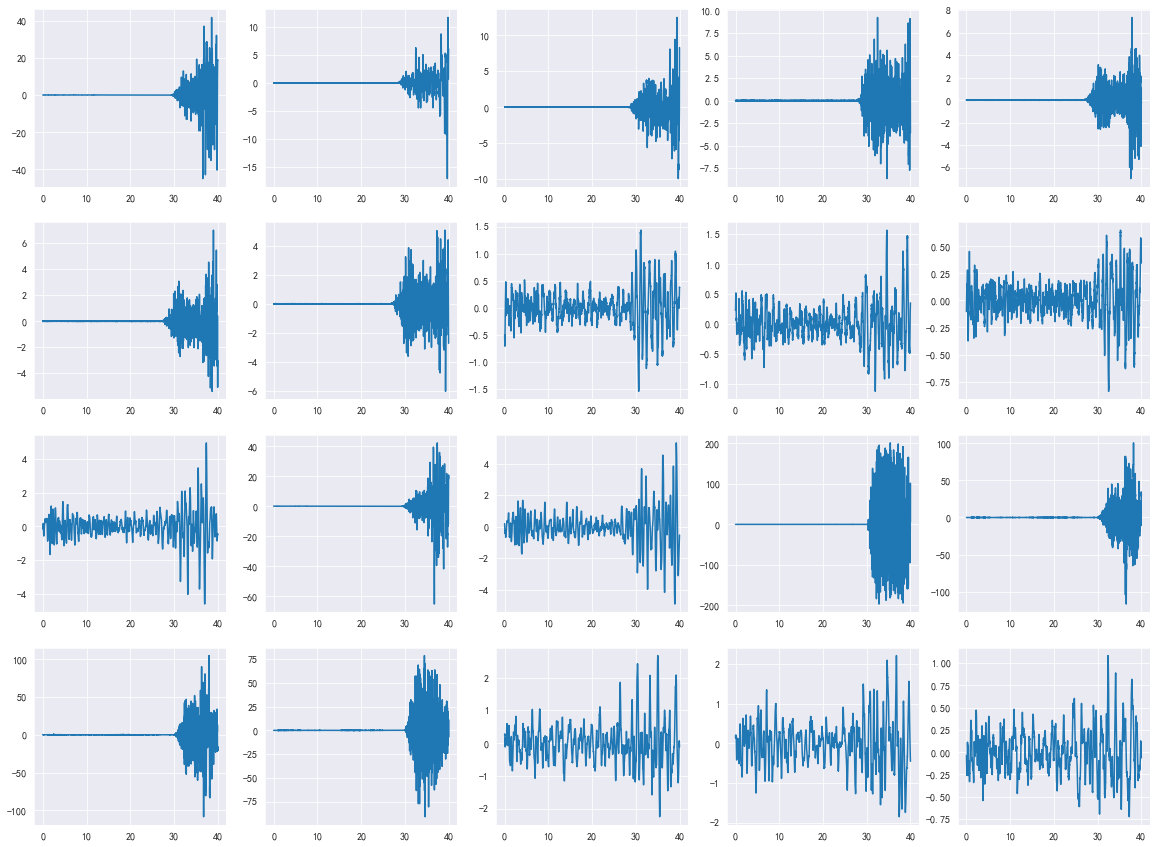

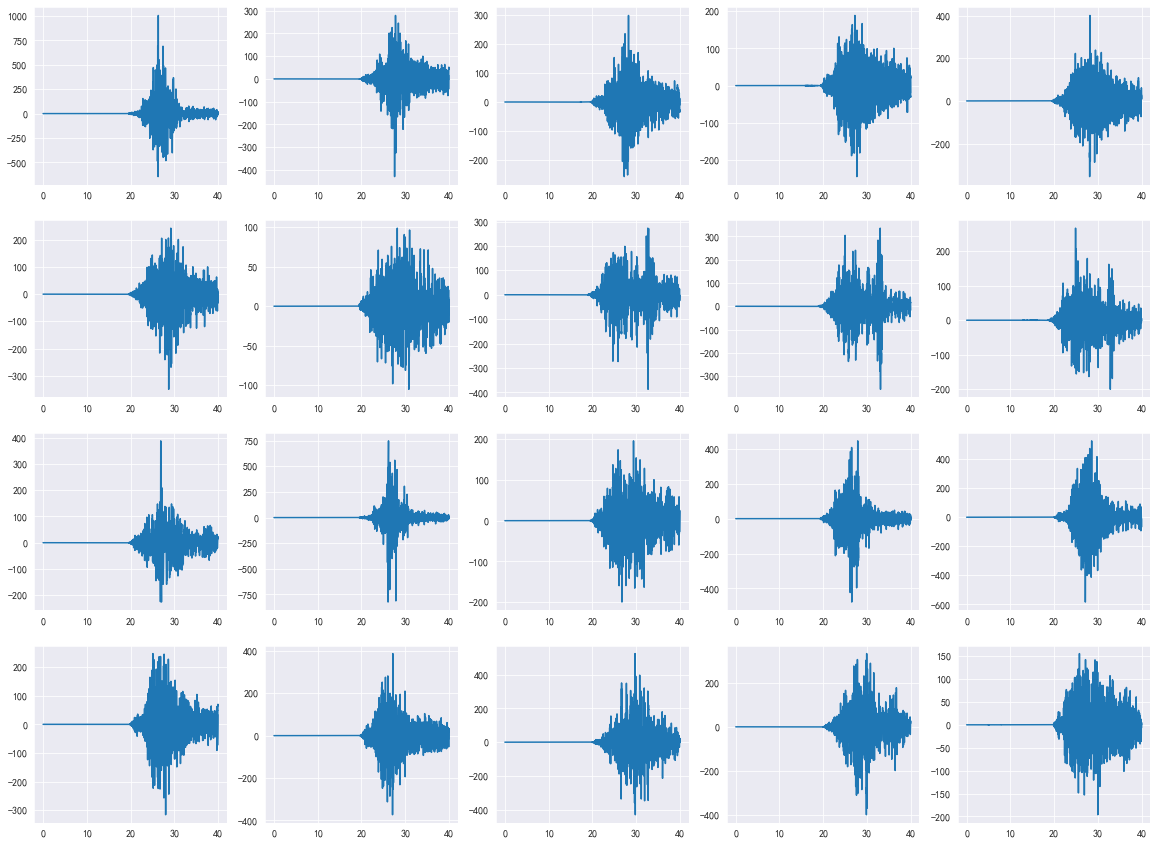

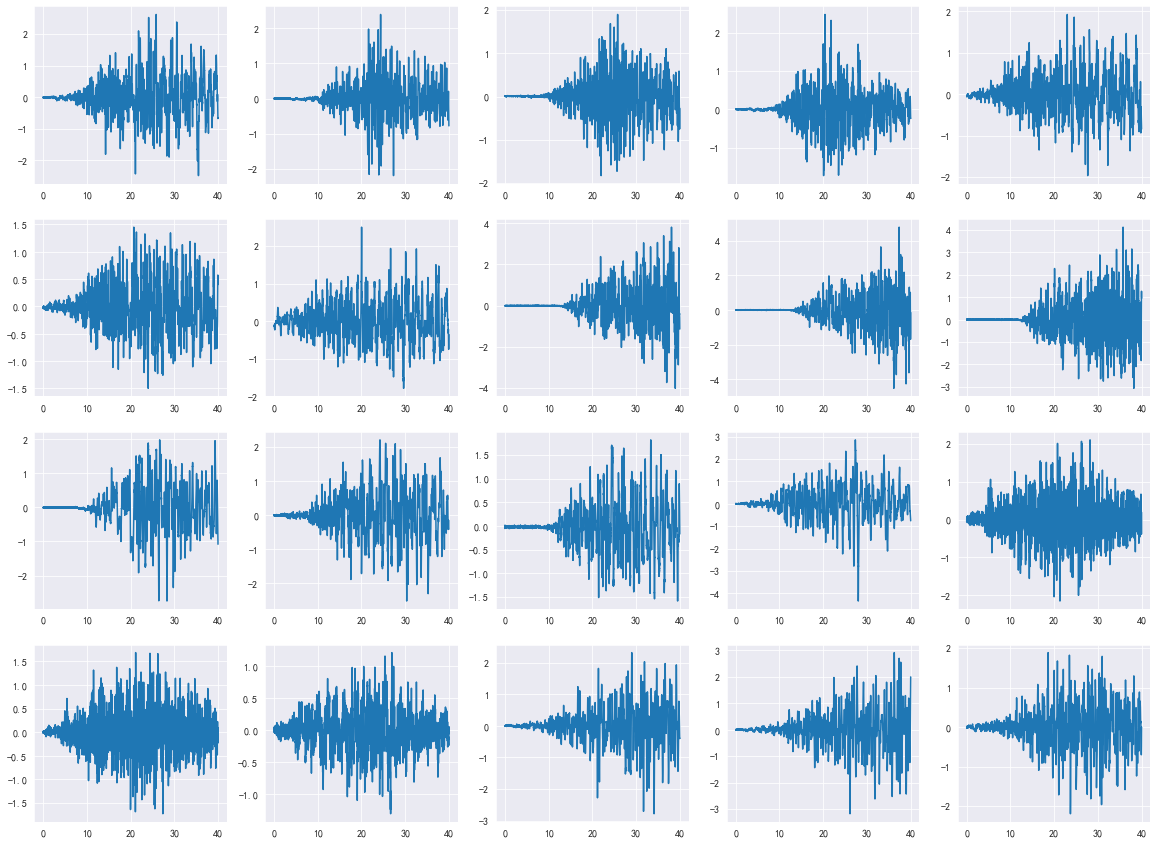

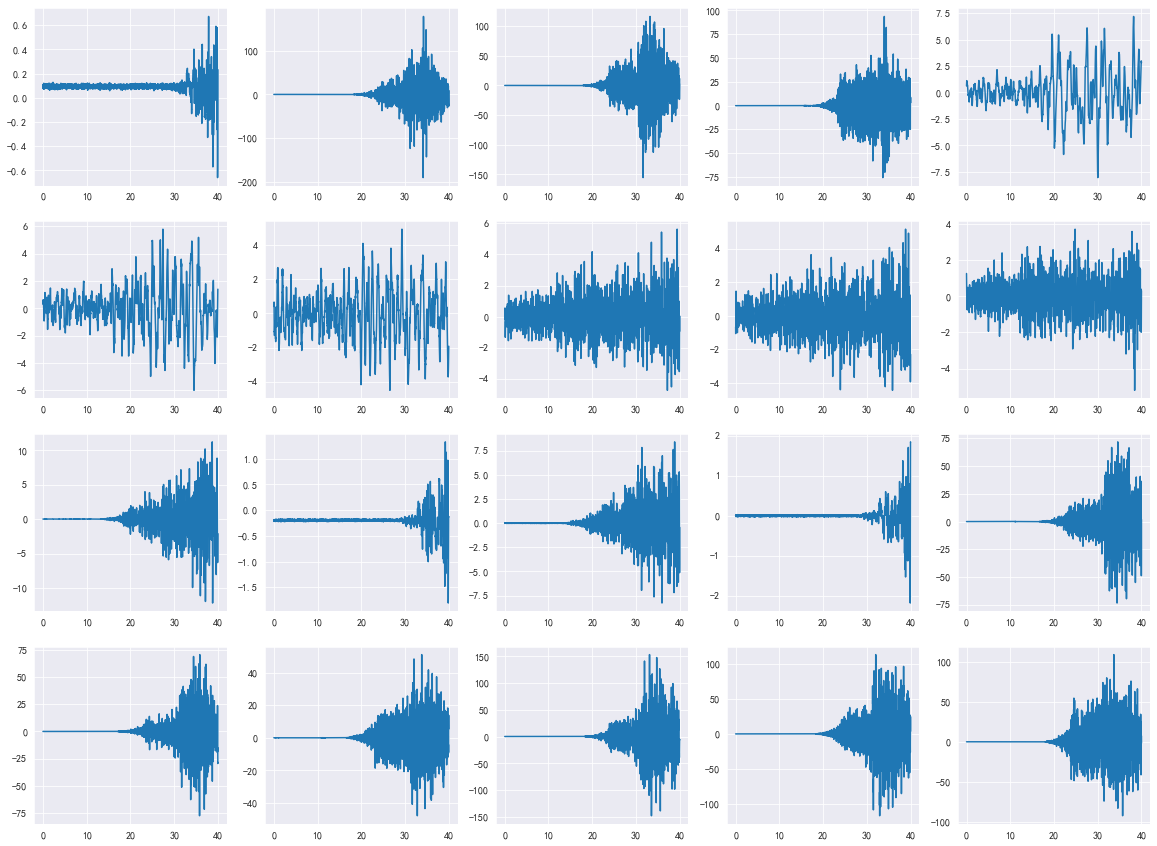

In [10]:
for i in earth:
    plot_event(i)

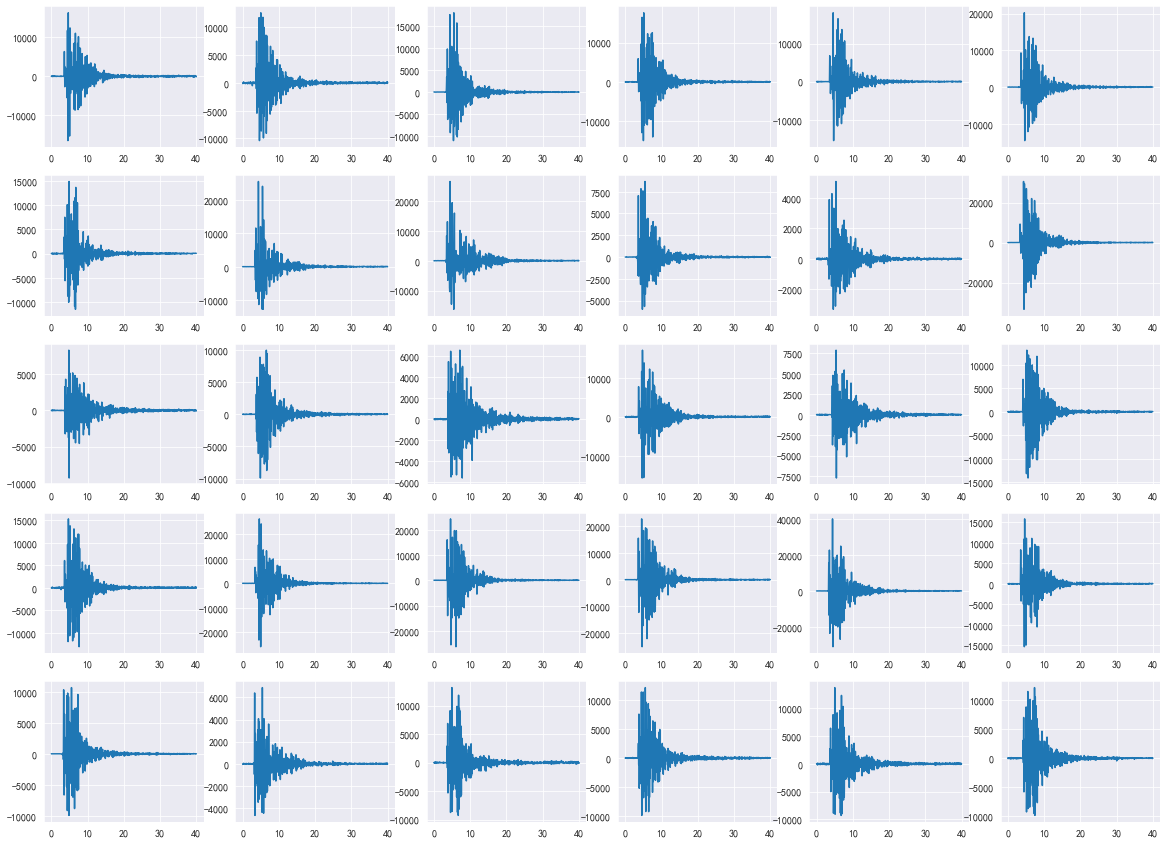

In [11]:
plot_event(shed[0])

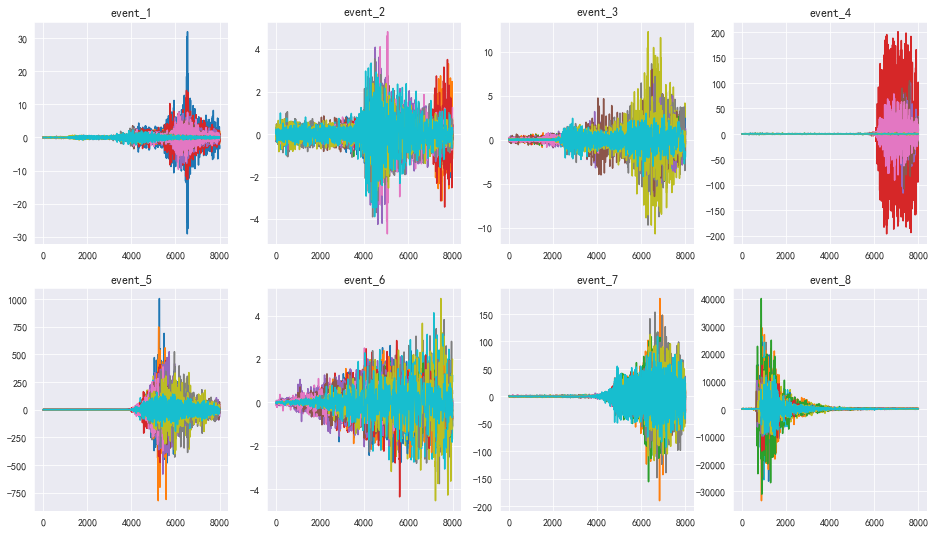

In [12]:
count = 1
plt.figure(figsize=(16, 9))
for i in earth:
    plt.subplot(2, 4, count)
    plt.title(f'event_{count}')
    plt.plot(i)
    count += 1
plt.subplot(248)
plt.title('event_8')
plt.plot(shed[0])
create_figure('overall')

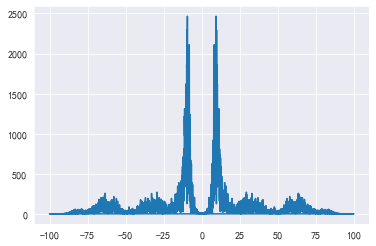

In [13]:
freqs = np.fft.fftfreq(8000, 1/200)
fft = np.fft.fft(data['1_1'])
plt.plot(freqs, np.abs(fft))

In [14]:
def plot_event_psd(event: pd.DataFrame, freq=200) -> None:
    plt.figure(figsize=(20, 15))
    feather = event.shape
    wide = np.ceil(feather[1] / 5)
    # time = np.arange(0, feather[0]) / freq
    count = 1
    for i in event.columns:
        plt.subplot(min(wide, 5), max(wide, 5), count)
        # print(i)
        plt.psd(event[i], Fs=200, scale_by_freq=True, noverlap=0)
        count += 1
    create_figure(f'event_psd_{event.columns.tolist()[0].split("_")[0]}')

In [15]:
def plot_event_psd_all(event: List[pd.DataFrame], freq=200) -> None:
    plt.figure(figsize=(20, 12))
    length = len(event)
    wide = np.ceil(length / 4)
    count = 1
    for e in event:
        plt.subplot(min(wide, 4), max(wide, 4), count)
        for i in e.columns:
            plt.psd(e[i], Fs=freq, scale_by_freq=True, noverlap=0)
        count += 1
    create_figure(f'event_psd')

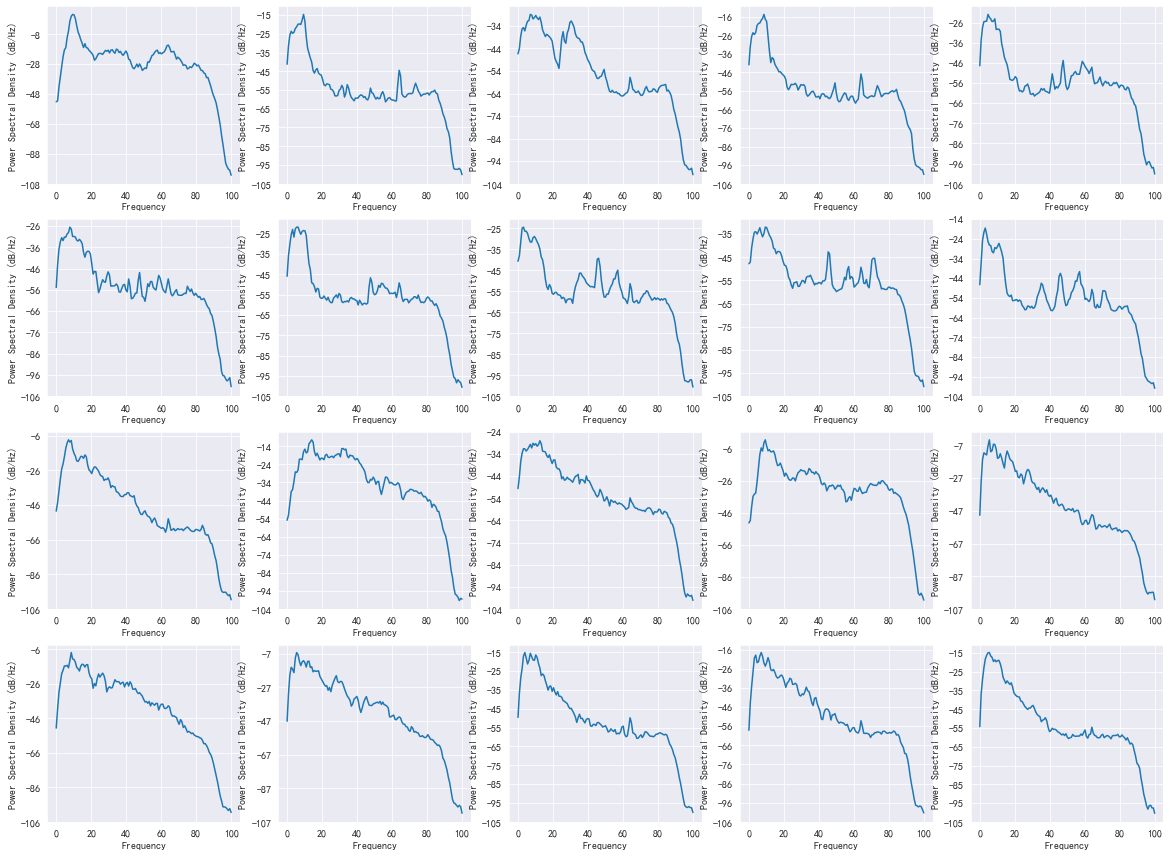

In [16]:
plot_event_psd(earth[0])

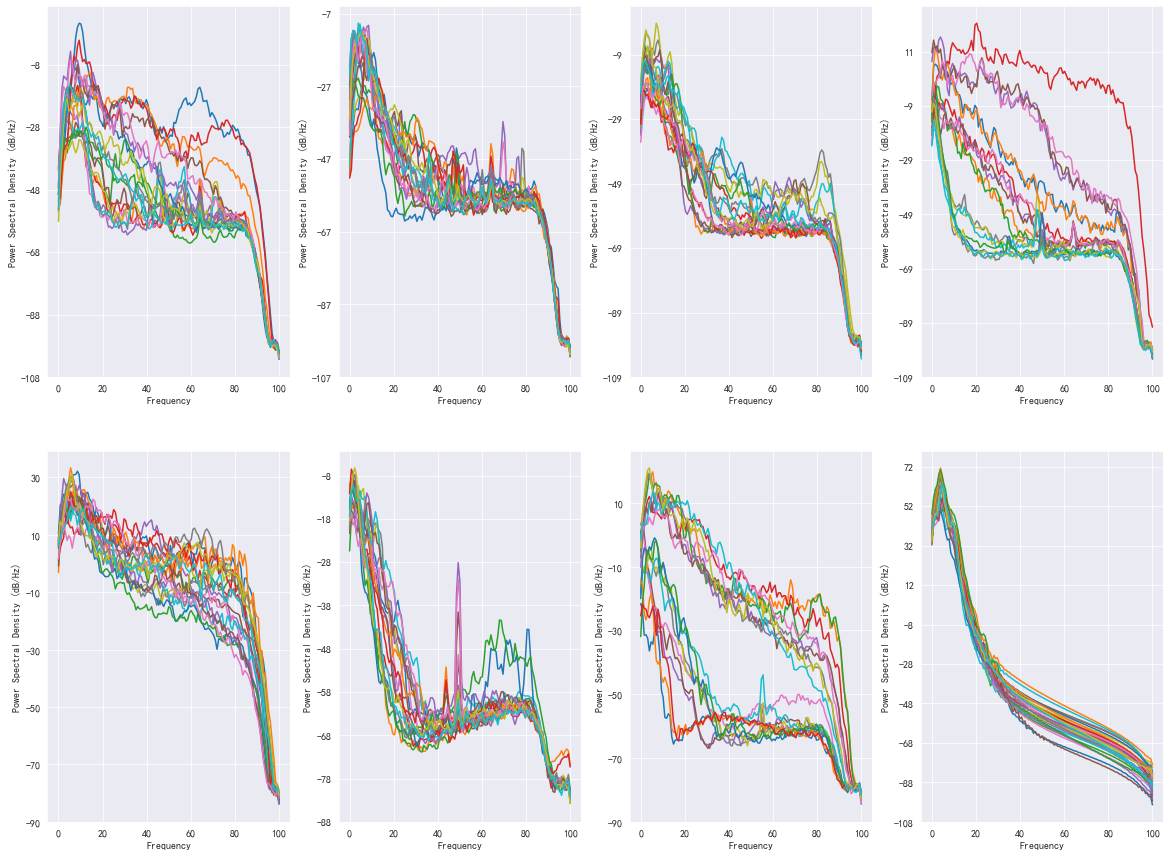

In [17]:
plot_event_psd_all(earth + shed)

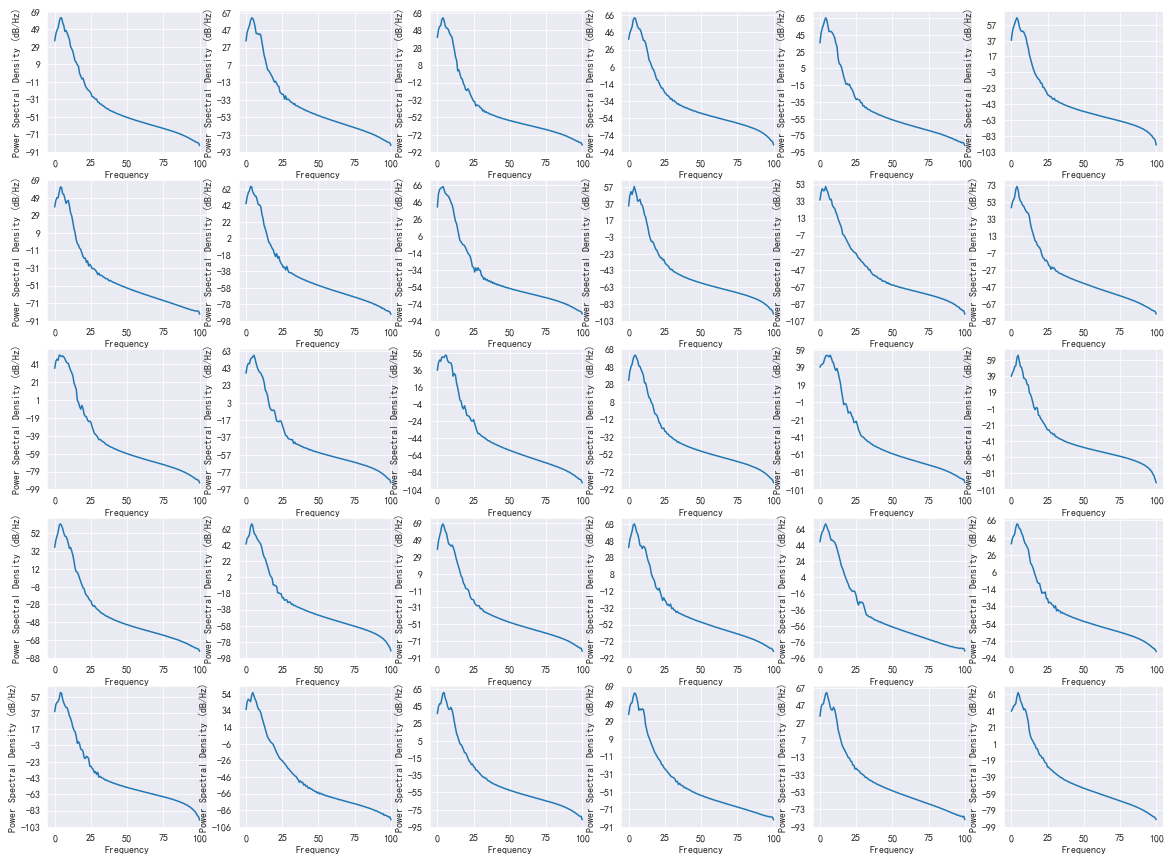

In [18]:
plot_event_psd(shed[0])

In [19]:
import gc
from ssqueezepy import cwt, stft, ssq_cwt, ssq_stft, Wavelet, imshow
from ssqueezepy.utils import process_scales, padsignal, p2up, cwt_scalebounds, make_scales
from ssqueezepy.ssqueezing import _compute_associated_frequencies

In [20]:
def ssq_scale2freq(scales, samprate):

    freq = scales.flatten()
    freq = 1 / freq * (samprate / 2)

    return freq

def time_freq(series):
    N = p2up(8000)[0]
    wavelet = Wavelet('gmw', N, 'float32')
    depart = series - np.mean(series)
    minium, maxium = cwt_scalebounds(wavelet, N=N, preset='minimal')
    scales = make_scales(N, minium, maxium, 16, 'log-piecewise', wavelet, 1)
    _, cfs, cfs_scales, *_ = ssq_cwt(series, wavelet=wavelet, scales=scales, padtype='reflect', fs=200)
    freq = ssq_scale2freq(cfs_scales, 200)
    imshow(cfs, abs=1, yticks=freq,)

,1_1,1_10,1_11,1_12,1_13,1_14,1_15,1_16,1_17,1_18,...,8_28,8_29,8_3,8_30,8_4,8_5,8_6,8_7,8_8,8_9
0,4.796264e-06,7.551747e-05,2.290024e-05,6.495474e-05,1.800603e-05,3.236246e-06,2.509957e-05,8.655257e-05,1.653017e-05,1.857385e-05,...,5.933743e+03,9.437185e+03,6.386990e+04,7.521694e+03,7.398994e+03,3.152258e+03,4.397148e+03,4.728692e+03,2.745104e+03,1.112152e+04
1,5.497649e-06,7.101913e-04,3.960055e-05,6.281387e-04,3.443828e-04,3.670596e-05,2.592757e-04,1.585093e-04,1.939732e-05,2.551695e-04,...,5.762508e+04,7.467174e+04,3.947840e+05,3.210065e+04,5.384598e+04,2.651267e+04,2.971132e+04,3.271628e+04,3.115079e+04,2.094819e+04
2,4.556034e-05,2.714144e-03,1.409559e-04,2.224410e-03,1.426693e-03,2.006227e-04,9.094173e-04,7.623778e-04,7.917780e-05,3.325443e-03,...,2.269646e+05,2.640242e+05,1.109684e+06,6.478384e+04,9.995002e+04,5.543168e+04,6.270119e+04,9.087477e+04,6.486759e+04,4.560257e+04
3,2.237767e-04,4.326447e-03,2.954963e-04,3.499195e-03,2.784674e-03,4.504541e-04,2.807041e-03,3.259194e-03,1.945744e-04,8.524526e-03,...,7.663660e+05,7.926020e+05,1.842402e+06,1.035623e+05,1.251273e+05,4.190017e+04,6.006544e+04,1.062822e+05,7.341107e+04,6.081311e+04
4,1.007550e-03,3.372319e-03,3.370104e-04,2.798737e-03,2.891026e-03,7.087899e-04,4.992996e-03,3.664146e-03,3.794974e-04,1.398198e-02,...,4.083353e+06,4.286561e+06,5.806088e+06,6.054141e+05,3.103821e+05,2.883509e+04,2.569193e+05,4.746132e+05,2.730264e+05,9.908469e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,3.848236e-10,1.842049e-10,2.037392e-10,2.005905e-10,3.134950e-10,1.662768e-10,1.463211e-10,1.567516e-10,2.285002e-10,2.221725e-10,...,1.710922e-08,1.095031e-08,4.244663e-09,8.208153e-09,3.766294e-09,5.548968e-10,8.126710e-09,1.173383e-08,8.485629e-09,2.957541e-09
125,2.205852e-10,1.847210e-10,1.689543e-10,1.786028e-10,2.126231e-10,1.337722e-10,2.087291e-10,1.555326e-10,1.626345e-10,1.950115e-10,...,1.526551e-08,8.927212e-09,4.113008e-09,6.165390e-09,2.094594e-09,4.594379e-10,6.316590e-09,1.043534e-08,8.569482e-09,2.234453e-09
126,1.463996e-10,2.088431e-10,1.688020e-10,1.411738e-10,1.505538e-10,1.525599e-10,1.705794e-10,1.967133e-10,1.385670e-10,1.767249e-10,...,1.179912e-08,9.334943e-09,3.803565e-09,5.284360e-09,1.239058e-09,3.604182e-10,5.175864e-09,1.071699e-08,6.807327e-09,2.017350e-09
127,1.270058e-10,1.681711e-10,1.924916e-10,1.422223e-10,1.606695e-10,1.906204e-10,1.500517e-10,1.916659e-10,1.612872e-10,1.952327e-10,...,1.168934e-08,6.968685e-09,3.858497e-09,4.133090e-09,8.645566e-10,3.950183e-10,5.086851e-09,9.993769e-09,8.376038e-09,1.576694e-09


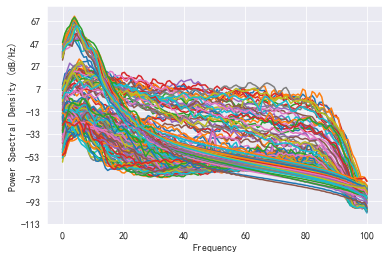

In [22]:
psd = pd.DataFrame()

for i in data.columns:
    psd[i] = plt.psd(data[i], return_line=False, Fs=200)[0]

psd

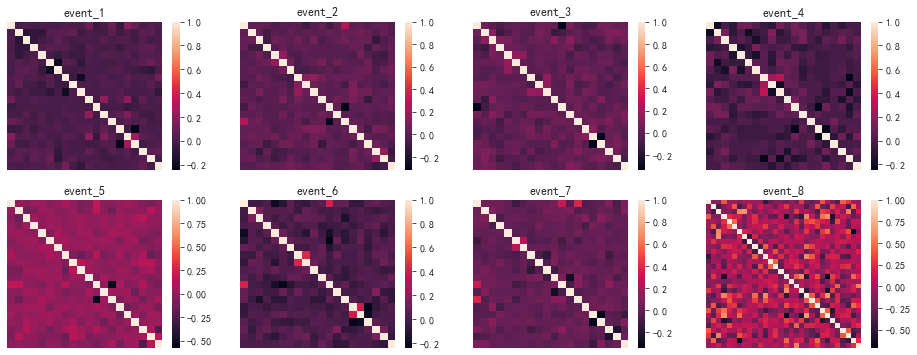

In [23]:
def plot_heatmap(series_list: List[pd.DataFrame]) -> None:
    count = 1
    plt.figure(figsize=(16, 6))
    for i in series_list:
        plt.subplot(2, 4, count)
        corr = i.corr()
        sns.heatmap(corr, xticklabels=False, yticklabels=False)
        plt.title(f'event_{count}')
        count += 1
    create_figure('primite_corr')

plot_heatmap(earth + shed)

In [24]:
import pickle

with open(RESULT_PATH + 'earth.list', 'wb') as f:
    pickle.dump(earth, f)
with open(RESULT_PATH + 'unnatural.list', 'wb') as f:
    pickle.dump(shed, f)
data.to_csv(RESULT_PATH + 'all.csv')
psd.to_csv(RESULT_PATH + 'psd.csv')